In [38]:
import pandas as pd

df = pd.read_csv('news.csv')

In [39]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [40]:
df['content'] = df['author']+' '+df['title']

In [41]:
df = df.dropna(subset=['content'])

In [42]:
df = df.drop(['id','text','title','author'], axis=1)
df.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [43]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def stemming(content):
    porter_stem = PorterStemmer()
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [porter_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF_Vectorizer = TfidfVectorizer()

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=1)

In [46]:
x_train_selected = TF_IDF_Vectorizer.fit_transform(X_train)

x_test_selected = TF_IDF_Vectorizer.transform(X_test)

In [47]:
from sklearn.naive_bayes import MultinomialNB

NaiveBayes_classifier = MultinomialNB()
NaiveBayes_classifier.fit(x_train_selected, y_train)

MultinomialNB()

In [48]:
y_pred_N = NaiveBayes_classifier.predict(x_test_selected)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_N = accuracy_score(y_test, y_pred_N) * 100

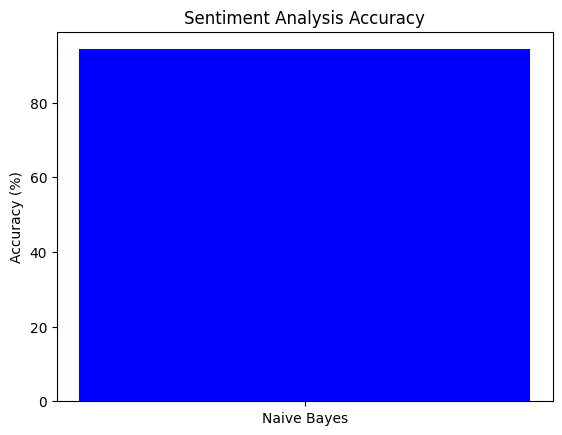

accuracy:94.28493300519551%


In [50]:
import matplotlib.pyplot as plt

plt.bar(['Naive Bayes'], [accuracy_N], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy_N}%')

In [51]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_selected, y_train)

SVC()

In [52]:
y_pred = svm_model.predict(x_test_selected)

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100

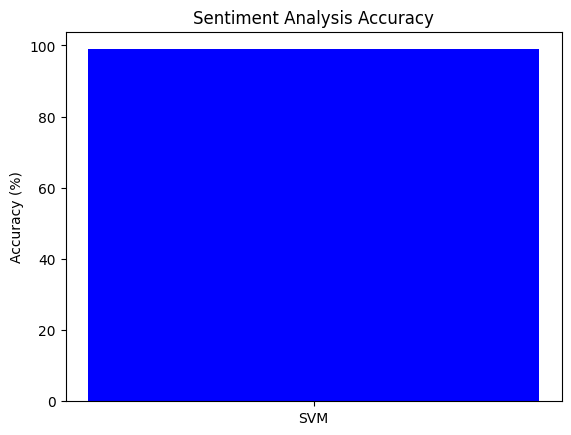

accuracy:98.93355209187858%


In [54]:
import matplotlib.pyplot as plt

plt.bar(['SVM'], [accuracy], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy}%')